# Regresión lineal polinómica
Oscar Oswaldo Estrada Morales<br>
Inteligencia Artificial<br>
Ingeniería Bioinformática

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Task 1.1

In [3]:
#Carga del archivo
data = np.genfromtxt("kc_house_data.csv", delimiter=",", skip_header=1, dtype=float)

#Seteo de variables 
y = data[:, 2] #Price
x = data[:, 5] #sqft_living

### Task 1.2

In [4]:
DATASET_SET_SIZE = x.shape[0]
DATASET_X_LIM = np.max(x)

In [5]:
#Creacion de funciones de costo y gradiente
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [6]:
#Creamos nuestra funcion de regresion lineal 
def linreg(X, y, t, cost,  grad, a=0.1, n = 100):
    costs = []
    for i in range(n):
        t -= a * grad(X,y,t)
        costs.append(cost(X,y,t))
    
    return t, costs

In [7]:
#Ajustamos los shapes de los arrays y los stackeamos a np.ones
X = x.reshape(DATASET_SET_SIZE, 1)
Xr = np.hstack((
    np.ones((DATASET_SET_SIZE, 1)),
    X)
)
y = y.reshape(DATASET_SET_SIZE, 1)

### Task 1.3

In [8]:
#Ejecutamos el modelo 
to = np.random.rand(Xr.shape[1], 1)

tf, costs = linreg(Xr, y, to, cost, grad, a = 0.0000001, n =10000)
print("TF (Theta resultante): ", tf)

TF (Theta resultante):  [[-13.83224174]
 [263.09475418]]


In [21]:
#Linea de tendencia
xm = np.array([[0], [DATASET_X_LIM]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm)
)
ym = (xmr @ tf)

C:\Users\oestr\AppData\Local\Temp\ipykernel_10492\967315507.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, y, "ro", color = "pink")


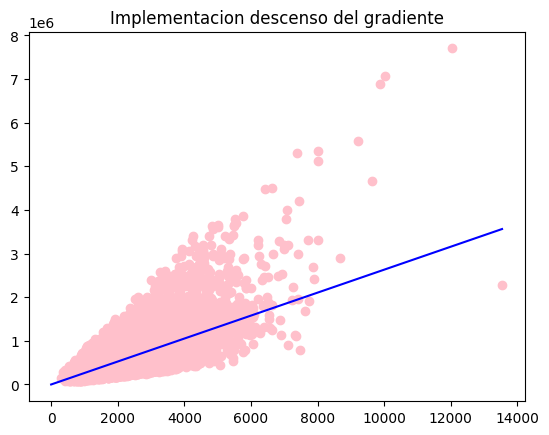

In [10]:
#Graficamos
plt.plot(X, y, "ro", color = "pink")
plt.plot(xm, ym, color = "blue")
plt.title('Implementacion descenso del gradiente')
plt.show()

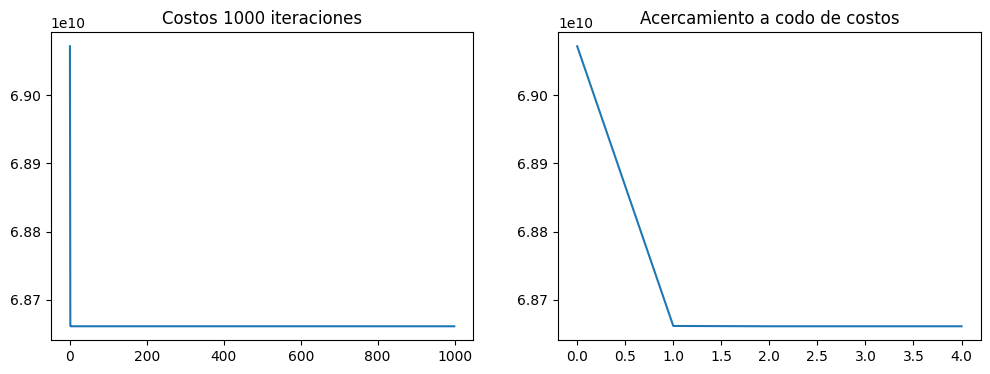

In [13]:
#Grafica de costos y acercamiento para ubicar el codo de iteraciones
plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = [14, 4]
plt.plot(np.arange(1000), costs[:1000])
plt.title('Costos 1000 iteraciones')

plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = [14, 4]
plt.plot(np.arange(5), costs[:5])
plt.title('Acercamiento a codo de costos')


plt.show()

In [23]:
#Coeficiente de correlación de pearson 
np.corrcoef(X.reshape(1, DATASET_SET_SIZE), y.reshape(1, DATASET_SET_SIZE))


array([[1.        , 0.70203505],
       [0.70203505, 1.        ]])

### Task 1.4

TF (Theta resultante):
  [[-204.3775571]
 [ 264.6554826]]

Coreficiente de correlacion de pearson:
 [[1.         0.70747865]
 [0.70747865 1.        ]]


C:\Users\oestr\AppData\Local\Temp\ipykernel_10492\4282129978.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(Xtrc, ytrc, "ro", color = "springgreen")


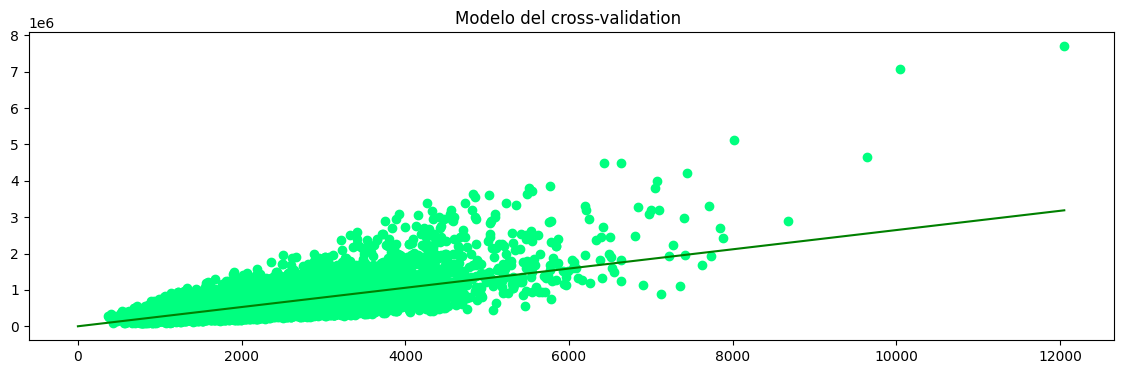

In [73]:
#Carga del archivo
data_cross = np.genfromtxt("kc_house_data.csv", delimiter=",", skip_header=1, dtype=float)

#Realizamos el shuffle de la data
np.random.shuffle(data_cross)
cross_val_set = data_cross.shape[0] // 3

# Usamos la notación de slicing de Python para separar el set de training y test
test = data_cross[:cross_val_set]
training = data_cross[cross_val_set:]

#Seteo de variables del training
ytrc = training[:, 2] #Price
xtrc = training[:, 5] #sqft_living

#Ajustamos los shapes de los arrays y los stackeamos a np.ones
Xtrc = xtrc.reshape(xtrc.shape[0], 1)
Xrtrc = np.hstack((
    np.ones((xtrc.shape[0], 1)),
    Xtrc)
)
ytrc = ytrc.reshape(xtrc.shape[0], 1)

#Ejecutamos el modelo 
tocv = np.random.rand(Xrtrc.shape[1], 1)

tfcv, costscv = linreg(Xrtrc, ytrc, to, cost, grad, a = 0.0000001, n =10000)
print("TF (Theta resultante):\n ", tfcv)

#Linea de tendencia
xmtrc = np.array([[0], [np.max(xtrc)]])
xmrtrc = np.hstack((
    np.ones((2, 1)),
    xmtrc)
)
ymtrc = (xmrtrc @ tfcv)

#Coeficiente de correlación de pearson 
print("\nCoreficiente de correlacion de pearson:\n", np.corrcoef(Xtrc.reshape(1, xtrc.shape[0]), ytrc.reshape(1, xtrc.shape[0])))

#Graficamos
plt.plot(Xtrc, ytrc, "ro", color = "springgreen")
plt.plot(xmtrc, ymtrc, color = "green")
plt.title('Modelo del cross-validation ')
plt.show()

C:\Users\oestr\AppData\Local\Temp\ipykernel_10492\448686209.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xtsc, modelo_pred, "ro", color = "blue")
C:\Users\oestr\AppData\Local\Temp\ipykernel_10492\448686209.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xtsc, ytsc, "ro", color = "brown")


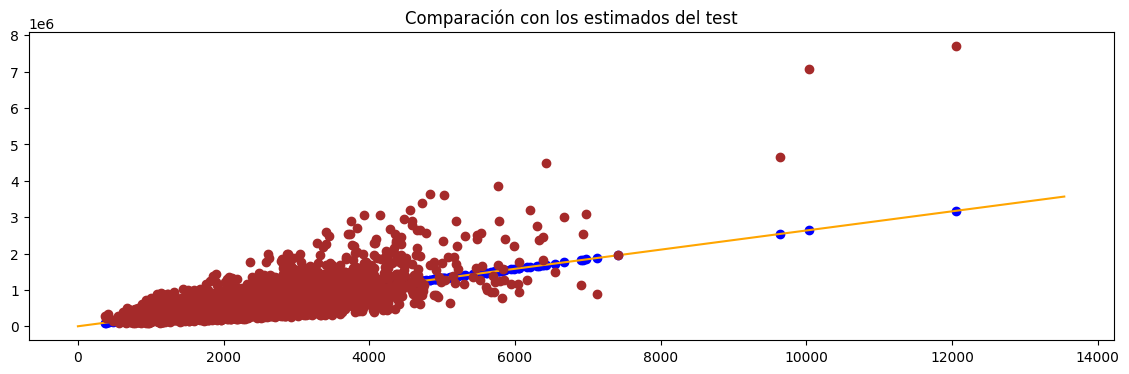

In [72]:
#Seteo de variables del training
ytsc = test[:, 2] #Price
xtsc = test[:, 5] #sqft_living

modelo_pred = tfcv[0][0] + (tfcv[1][0]*xtsc)

plt.plot(xtsc, modelo_pred, "ro", color = "blue")
plt.plot(xmtrc, ymtrc, color = "orange")
plt.plot(xtsc, ytsc, "ro", color = "brown")
plt.title('Comparación con los estimados del test')
plt.show()

### Task 1.5

Tras haber realizado la implementación vectorial del algoritmo de regresión lineal, podemos ver que la gráfica si muestra encontrar una relación entre las variables de "price" y "sqft_living". En este caso, se encontró que las thetas resultantes son [[-13.89487335], [263.09477938]] por lo que formaríamos prácticamente una ecuación del polinomio tal que: h(x) = Θ<sub>0</sub> + Θ<sub>1</sub>X<sub>1</sub>. Por lo que la fórmula final la tendríamos como h(x) = -13.89 + 263.09X<sub>1</sub>.

Seguidamente, en el caso del costo, se refiere a la cantidad de error entre la línea de regresión calculada y los datos de entrenamiento reales. Vemos el gráfico realizado que la línea comienza en un punto alto y disminuye a medida que el algoritmo se acerca a una solución óptima. El punto identificado fue en 1, por lo que consideraríamos este el número óptimo de iteraciones para la implementación del algoritmo.

De igual manera, podemos ver que por la cantidad de datos estudiada, existen varios puntos con una distancia muy grande, por lo que se deberían de aplicar más estudios de precisión para verificar la veracidad de los resultados, o de igual forma identificar un mejor grado de polinomio. Esto excluyendo el cross-validation realizado, el cual nos demostró que los datos estudiados logran devolver una respuesta similar a la del main.

En el caso del cross validation, podemos ver que los datos separados fueron en un 33.3% para el test y un 66.66% para el traininig. En este caso, encontramos que de igual forma se logra obtener un coeficiente de correlación de Pearson ≈ 0.7, el cual según teoría nos indica una buena correlación entre los datos.